## Gurobi example

This notebook demonstrates how to use `optiwindnet` to design collector system cable layouts using the **Gurobi MILP router**.

In [2]:
from optiwindnet.api import WindFarmNetwork, Heuristic, MILP, load_repository

In [3]:
# Display figures as SVG in Jupyter notebooks
%config InlineBackend.figure_formats = ['svg']

### Initialize Gwynt y Mor

>In this example, the `load_repository()` functionality is used to load a prebuilt *Networkx.Graph*. For more details on this functionality look into the notebook about [Load repositories containing location data](api_02-load-repositories.ipynb).

In [4]:
locations = load_repository()
wfn = WindFarmNetwork(L=locations.gwynt, cables=6)

<Axes: >

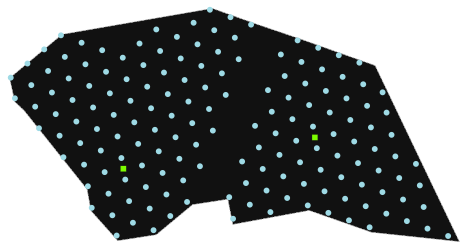

In [5]:
wfn.plot_location()

### Optimize Gwynt y Mor

Initial heuristic solution to warm-start the solver:

In [6]:
router_warmstart = Heuristic(solver='Esau_Williams')
res_warmstart= wfn.optimize(router=router_warmstart)

In [7]:
wfn.length()

138539.07480132734

The pyomo GurobiDirect class can work as context manager by passing the `manage_env=True` parameter to SolverFactory. Advantages of operating this way:
- the Gurobi license is released after the context's scope ends
- one can pass `options` that can only be set at the Gurobi environment creation (such as `threadlimit`)

In [9]:
solver_options=dict(
    num_workers = 8,
)

router_milp = MILP(solver_name='gurobi', time_limit=15, mip_gap=0.01, verbose=True)
res = wfn.optimize(router=router_milp)

>>> Using warm start: the model is initialized with the provided solution S <<<
Set parameter OutputFlag to value 1
Gurobi Optimizer version 12.0.3 build v12.0.3rc0 (win64 - Windows 11.0 (26100.2))

CPU model: 11th Gen Intel(R) Core(TM) i5-1145G7 @ 2.60GHz, instruction set [SSE2|AVX|AVX2|AVX512]
Thread count: 4 physical cores, 8 logical processors, using up to 8 threads

Non-default parameters:
TimeLimit  15
MIPGap  0.01
MIPFocus  1



GurobiError: Model too large for size-limited license; visit https://gurobi.com/unrestricted for more information

In [ ]:
wfn.G.SolutionInfo

SolutionInfo(runtime=15.104260000000002, bound=141351.27776184087, objective=146120.97659967092, relgap=0.032642122635804904, termination='FEASIBLE')

In [ ]:
wfn.plot()